# Twitter Sentiment Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_name = "Twitter.csv"
df = pd.read_csv(file_name, encoding="ISO-8859-1", header=None, names=["target", "id", "timestamp", "query", "user", "text"])

## Data Exploration:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   target     1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   timestamp  1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [4]:
tweet_content = df["text"]
timestamp = df["timestamp"]
sentiment_labels = df["target"]
print("\nUnique values in the sentiment labels (target) column:")
print(sentiment_labels.unique())
sentiment_counts = sentiment_labels.value_counts()
print("\nSentiment Label Distribution:")
print(sentiment_counts)


Unique values in the sentiment labels (target) column:
[0 4]

Sentiment Label Distribution:
target
0    800000
4    800000
Name: count, dtype: int64


In [5]:
print("\nExamples of Tweet Content and Timestamp:")
for i in range(5):
    print(f"Timestamp: {timestamp[i]}, Sentiment Label: {sentiment_labels[i]}, Tweet: {tweet_content[i]}")


Examples of Tweet Content and Timestamp:
Timestamp: Mon Apr 06 22:19:45 PDT 2009, Sentiment Label: 0, Tweet: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
Timestamp: Mon Apr 06 22:19:49 PDT 2009, Sentiment Label: 0, Tweet: is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
Timestamp: Mon Apr 06 22:19:53 PDT 2009, Sentiment Label: 0, Tweet: @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
Timestamp: Mon Apr 06 22:19:57 PDT 2009, Sentiment Label: 0, Tweet: my whole body feels itchy and like its on fire 
Timestamp: Mon Apr 06 22:19:57 PDT 2009, Sentiment Label: 0, Tweet: @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 


##  Data Cleaning:


In [6]:
df.isnull().sum()

target       0
id           0
timestamp    0
query        0
user         0
text         0
dtype: int64

In [7]:
df.drop(["query", "user"], axis=1, inplace=True)
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   target     1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   timestamp  1600000 non-null  object
 3   text       1600000 non-null  object
dtypes: int64(2), object(2)
memory usage: 48.8+ MB


In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['target'] = pd.to_numeric(df['target'], errors='coerce')
df['text'] = df['text'].str.replace('[^a-zA-Z\s]', '')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   target     1600000 non-null  int64         
 1   id         1600000 non-null  int64         
 2   timestamp  1600000 non-null  datetime64[ns]
 3   text       1600000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 48.8+ MB


## Exploratory Data Analysis (EDA):

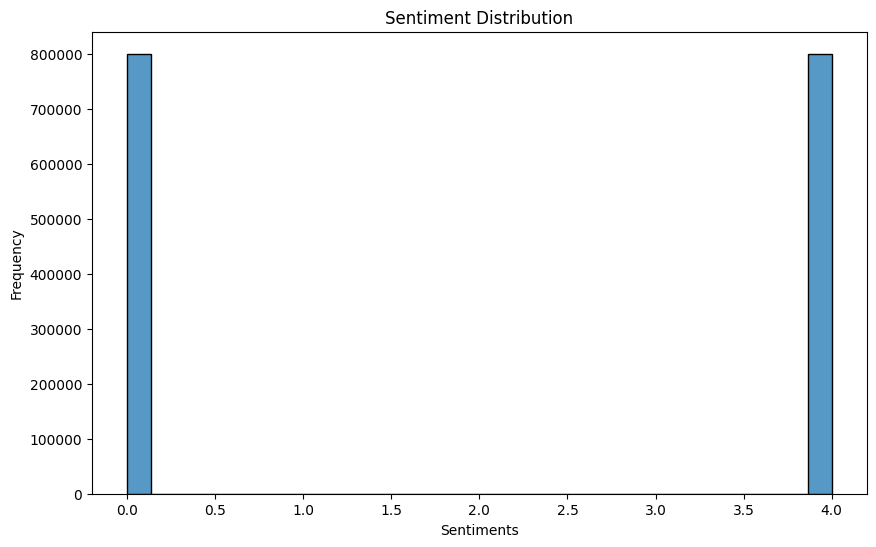

In [11]:
# Sentiment Label Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], bins=30)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiments")
plt.ylabel("Frequency")
plt.show()

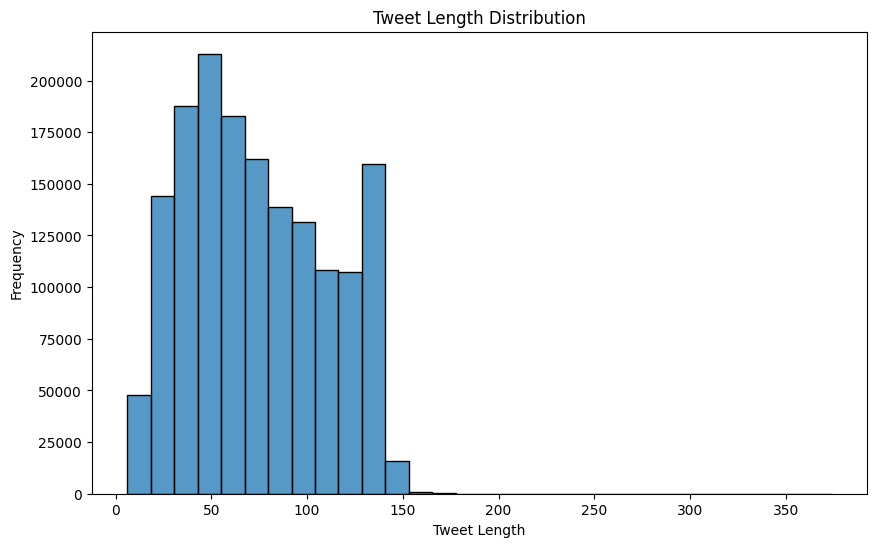

In [12]:
# Tweet Length Distribution
df['tweet_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=30)
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

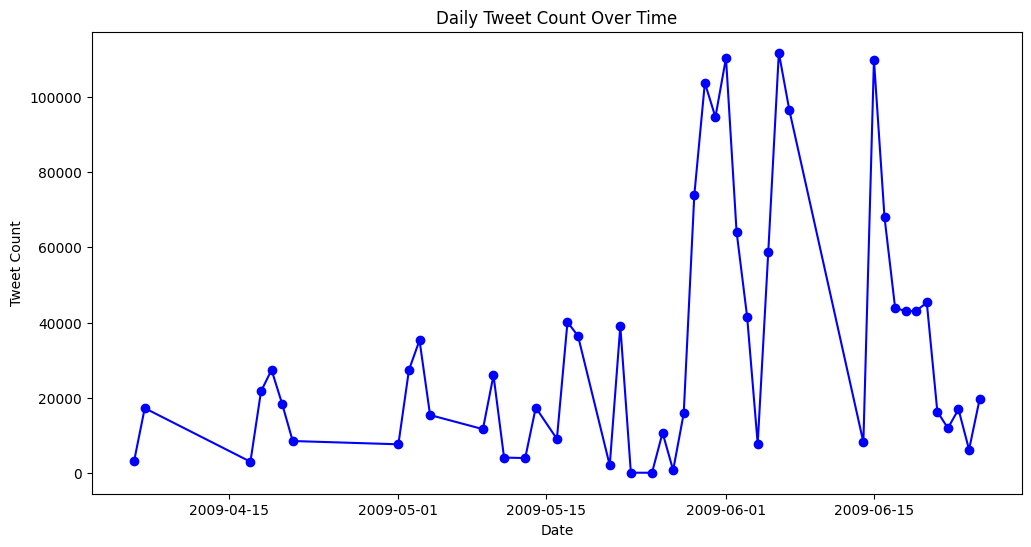

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
daily_tweet_count = df['date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
daily_tweet_count.plot(marker='o', linestyle='-', color='b')
plt.title("Daily Tweet Count Over Time")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.show()

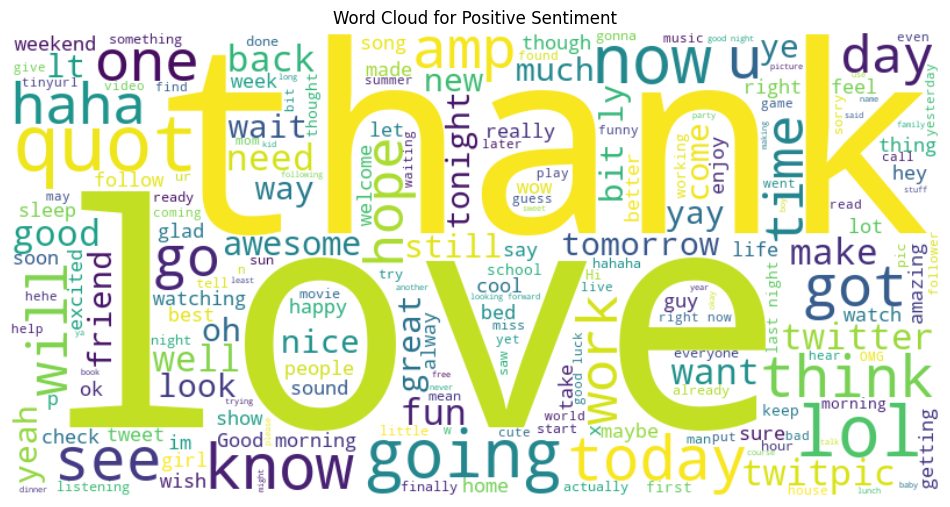

In [14]:
# Word Cloud for Positive Sentiment
positive_tweets = df[df['target'] == 4]['text']
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweets))
plt.figure(figsize=(12, 8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Positive Sentiment")
plt.axis('off')
plt.show()

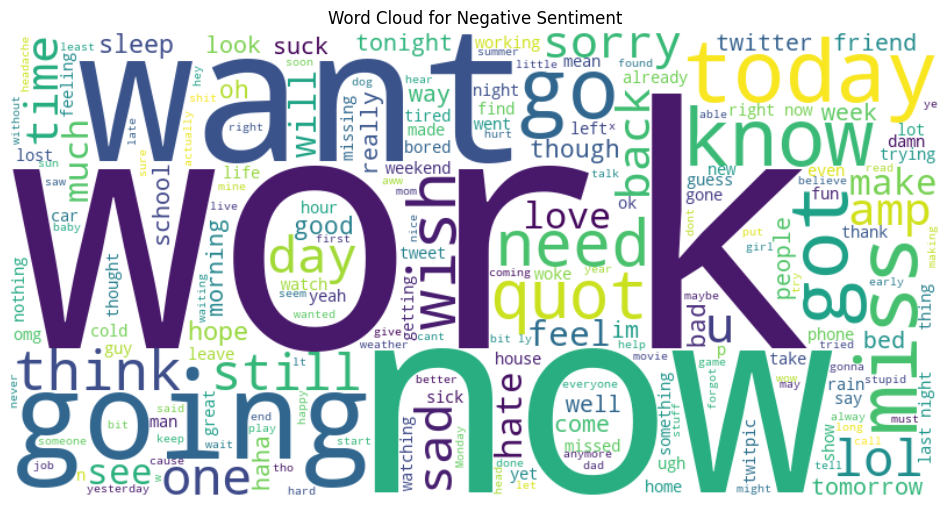

In [15]:
# Word Cloud for Negative Sentiment
negative_tweets = df[df['target'] == 0]['text']
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_tweets))
plt.figure(figsize=(12, 8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Negative Sentiment")
plt.axis('off')
plt.show()

## Sentiment Distribution:

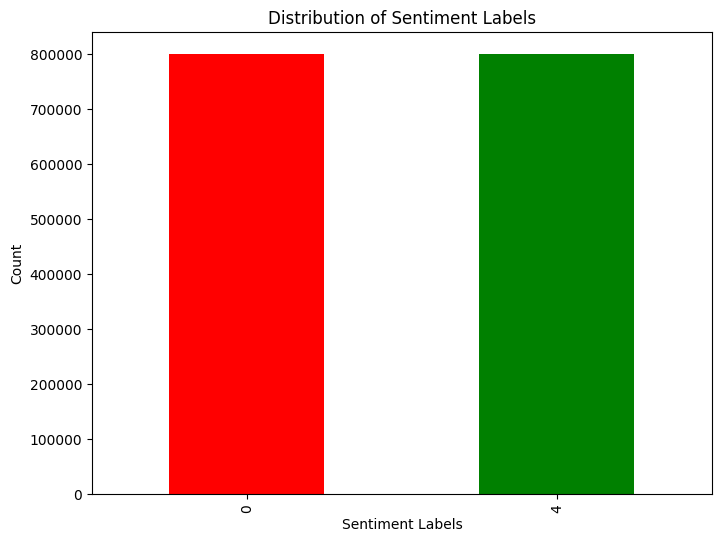

In [16]:
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment Labels")
plt.ylabel("Count")
plt.show()

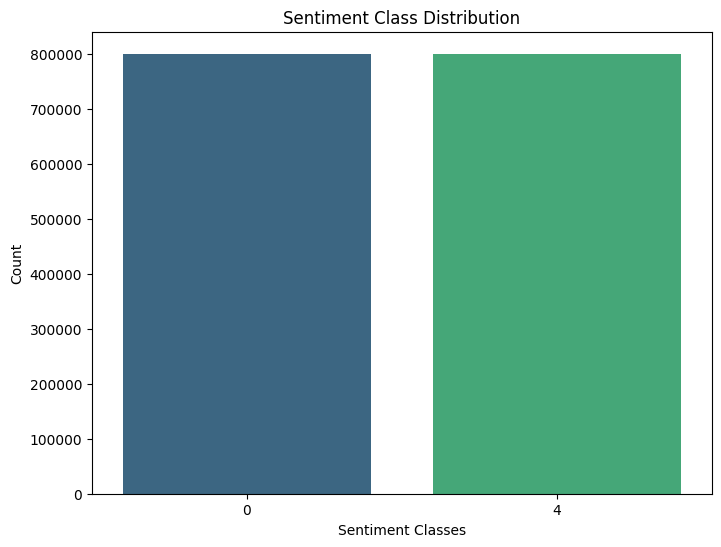

In [17]:
sentiment_counts = df['target'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment Classes")
plt.ylabel("Count")
plt.show()

## Word Frequency Analysis:

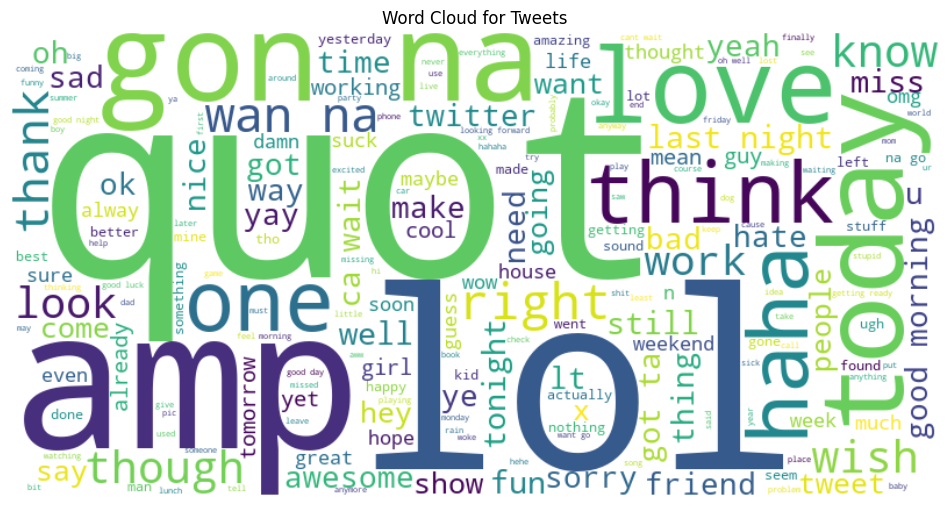

In [25]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
all_words = [word.lower() for text in df['text'] for word in word_tokenize(text) if word.isalpha() and word.lower() not in stop_words]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Tweets")
plt.axis('off')
plt.show()

##  Temporal Analysis:

<Figure size 1500x800 with 0 Axes>

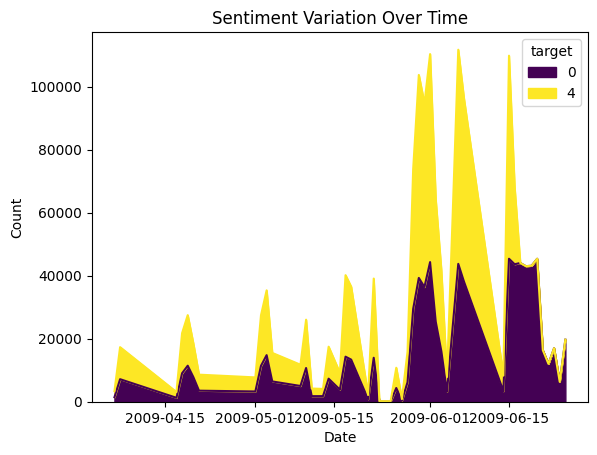

In [27]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
date_sentiment_counts = df.groupby(['date', 'target']).size().unstack().fillna(0)
plt.figure(figsize=(15, 8))
date_sentiment_counts.plot(kind='area', stacked=True, colormap="viridis")
plt.title("Sentiment Variation Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

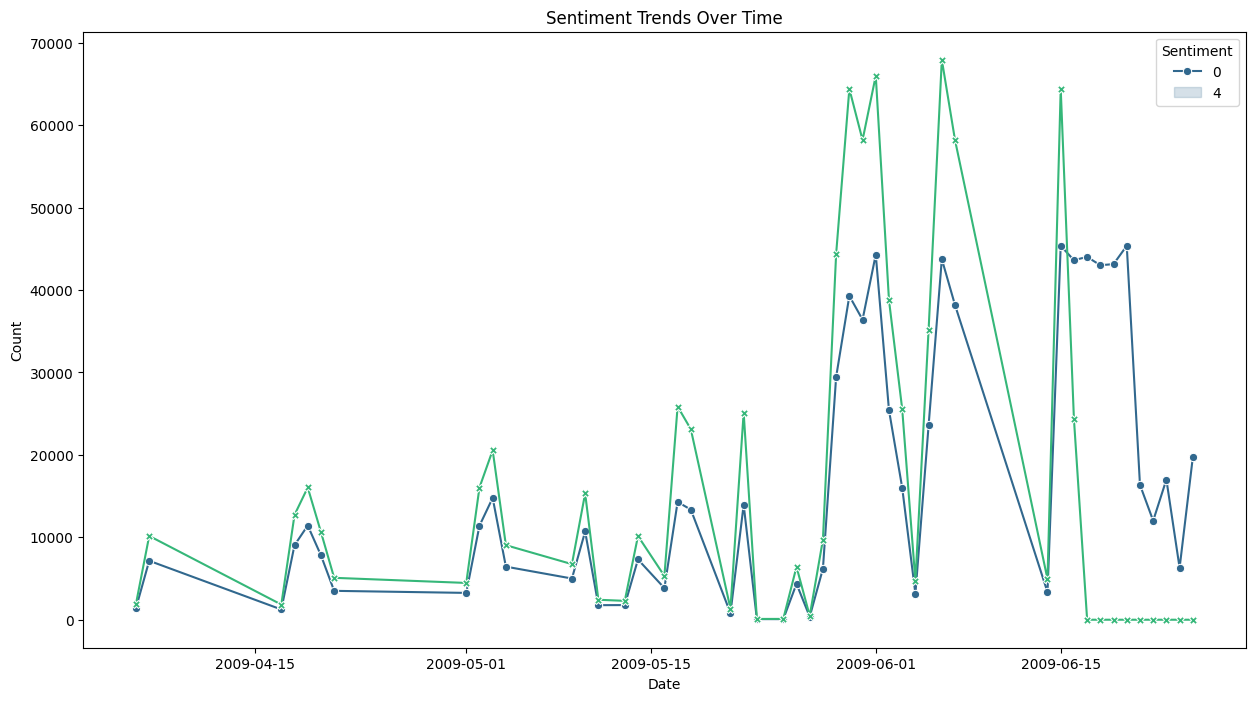

In [28]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=date_sentiment_counts, markers=True, dashes=False, palette="viridis")
plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(title="Sentiment", loc="upper right", labels=date_sentiment_counts.columns)
plt.show()

## Text Preprocessing:


In [30]:
import re
def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r"[^\w\s]", "", text)
    stop_words = set(stopwords.words("english"))
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return " ".join(tokens)
df['cleaned_text'] = df['text'].apply(preprocess_text)
print(df[['text', 'cleaned_text']].head())

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0  switchfoot thats bummer shoulda got david carr...  
1  upset cant update facebook texting might cry r...  
2  kenichan dived many times ball managed save re...  
3                   whole body feels itchy like fire  
4           nationwideclass behaving im mad cant see  


In [33]:
from nltk.stem import WordNetLemmatizer
def preprocess_and_lemmatize(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r"[^\w\s]", "", text)
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]    
    return " ".join(tokens)
df['processed_text'] = df['text'].apply(preprocess_and_lemmatize)
print(df[['text', 'processed_text']].head())

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                      processed_text  
0  switchfoot thats bummer shoulda got david carr...  
1  upset cant update facebook texting might cry r...  
2  kenichan dived many time ball managed save res...  
3                    whole body feel itchy like fire  
4           nationwideclass behaving im mad cant see  


## Sentiment Prediction Model:

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['target'], test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)
predictions = classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.77

Confusion Matrix:
 [[120047  39447]
 [ 32961 127545]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           4       0.76      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [38]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
df_subset = df.sample(frac=0.05, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df_subset['processed_text'], df_subset['target'], test_size=0.2, random_state=42)
max_features = 5000  
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)
predictions = classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')  
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.7601
F1 Score: 0.7601

Confusion Matrix:
 [[5959 2046]
 [1792 6203]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76      8005
           4       0.75      0.78      0.76      7995

    accuracy                           0.76     16000
   macro avg       0.76      0.76      0.76     16000
weighted avg       0.76      0.76      0.76     16000



## Feature Importance:


Top Positive Features:
      Feature  Coefficient
4340   thanks     4.100076
4776  welcome     3.568370
3935    smile     3.460836
4714     wait     3.218519
4337    thank     3.112389
4937      yay     3.108559
284   awesome     3.074594
2578     love     2.925621
1770     glad     2.876509
1801     good     2.819655

Top Negative Features:
      Feature  Coefficient
3672      sad    -7.695390
3282     poor    -5.146973
2759     miss    -5.049716
1947     hate    -4.744060
3864     sick    -4.679464
2762  missing    -4.560375
4838     wish    -4.197907
663      cant    -4.135875
4587      ugh    -4.071069
2119     hurt    -4.022907


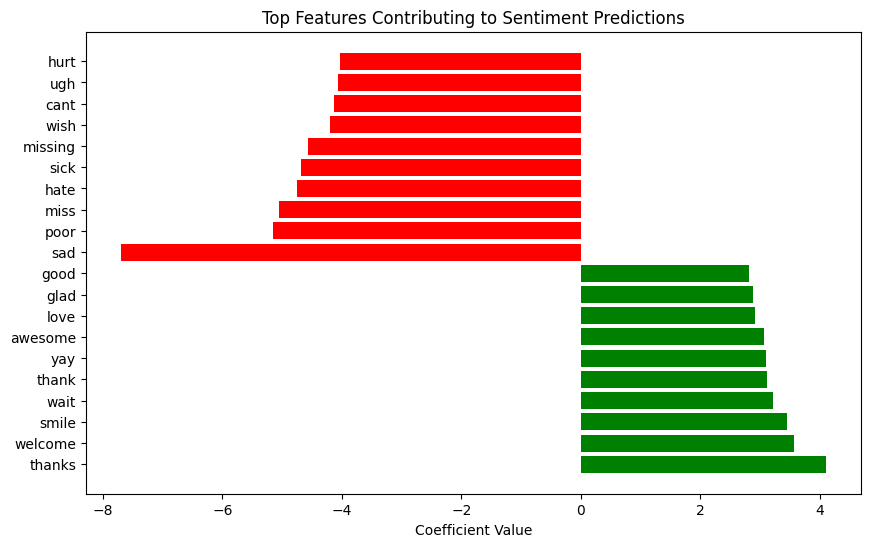

In [41]:
df_subset = df.sample(frac=0.05, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df_subset['processed_text'], df_subset['target'], test_size=0.2, random_state=42)
max_features = 5000  
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = classifier.coef_[0]
feature_coefficient_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
top_n = 10
top_positive_features = feature_coefficient_df.nlargest(top_n, 'Coefficient')
top_negative_features = feature_coefficient_df.nsmallest(top_n, 'Coefficient')
print("Top Positive Features:")
print(top_positive_features)
print("\nTop Negative Features:")
print(top_negative_features)
plt.figure(figsize=(10, 6))
plt.barh(top_positive_features['Feature'], top_positive_features['Coefficient'], color='green')
plt.barh(top_negative_features['Feature'], top_negative_features['Coefficient'], color='red')
plt.xlabel('Coefficient Value')
plt.title('Top Features Contributing to Sentiment Predictions')
plt.show()

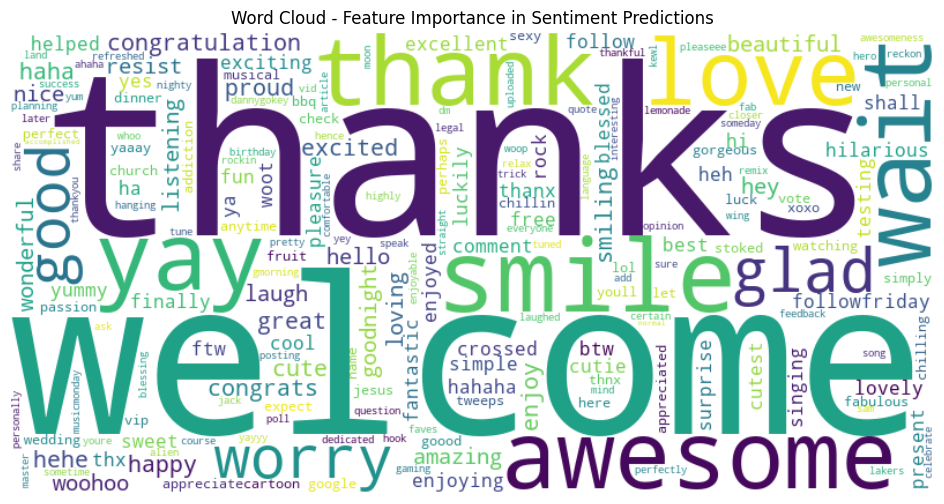

In [42]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(feature_names, coefficients)))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Feature Importance in Sentiment Predictions')
plt.show()